Validation Epoch 1: 100%|██████████| 86/86 [00:28<00:00,  3.04it/s]


Epoch 1/20, Train Loss: 0.1146, Validation Loss: 0.0692
Best model saved with validation loss: 0.0692


Validation Epoch 2: 100%|██████████| 86/86 [00:29<00:00,  2.90it/s]


Epoch 2/20, Train Loss: 0.0579, Validation Loss: 0.0580
Best model saved with validation loss: 0.0580


Validation Epoch 3: 100%|██████████| 86/86 [00:30<00:00,  2.83it/s]


Epoch 3/20, Train Loss: 0.0482, Validation Loss: 0.0479
Best model saved with validation loss: 0.0479


Validation Epoch 4: 100%|██████████| 86/86 [00:30<00:00,  2.83it/s]


Epoch 4/20, Train Loss: 0.0425, Validation Loss: 0.0456
Best model saved with validation loss: 0.0456


Validation Epoch 5: 100%|██████████| 86/86 [00:30<00:00,  2.81it/s]


Epoch 5/20, Train Loss: 0.0383, Validation Loss: 0.0496


Validation Epoch 6: 100%|██████████| 86/86 [00:28<00:00,  2.97it/s]


Epoch 6/20, Train Loss: 0.0361, Validation Loss: 0.0433
Best model saved with validation loss: 0.0433


Validation Epoch 7: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]


Epoch 7/20, Train Loss: 0.0336, Validation Loss: 0.0397
Best model saved with validation loss: 0.0397


Validation Epoch 8: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]


Epoch 8/20, Train Loss: 0.0317, Validation Loss: 0.0417


Validation Epoch 9: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]


Epoch 9/20, Train Loss: 0.0301, Validation Loss: 0.0395
Best model saved with validation loss: 0.0395


Validation Epoch 10: 100%|██████████| 86/86 [00:29<00:00,  2.89it/s]


Epoch 10/20, Train Loss: 0.0285, Validation Loss: 0.0415


Validation Epoch 11: 100%|██████████| 86/86 [00:28<00:00,  2.97it/s]


Epoch 11/20, Train Loss: 0.0272, Validation Loss: 0.0395
Best model saved with validation loss: 0.0395


Validation Epoch 12: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]


Epoch 12/20, Train Loss: 0.0264, Validation Loss: 0.0475


Validation Epoch 13: 100%|██████████| 86/86 [00:28<00:00,  3.00it/s]


Epoch 13/20, Train Loss: 0.0279, Validation Loss: 0.0433


Validation Epoch 14: 100%|██████████| 86/86 [00:28<00:00,  2.98it/s]


Epoch 14/20, Train Loss: 0.0236, Validation Loss: 0.0366
Best model saved with validation loss: 0.0366


Validation Epoch 15: 100%|██████████| 86/86 [00:28<00:00,  2.97it/s]


Epoch 15/20, Train Loss: 0.0226, Validation Loss: 0.0408


Validation Epoch 16: 100%|██████████| 86/86 [00:29<00:00,  2.95it/s]


Epoch 16/20, Train Loss: 0.0217, Validation Loss: 0.0391


Validation Epoch 17: 100%|██████████| 86/86 [00:29<00:00,  2.90it/s]


Epoch 17/20, Train Loss: 0.0211, Validation Loss: 0.0405


Validation Epoch 18: 100%|██████████| 86/86 [00:30<00:00,  2.85it/s]


Epoch 18/20, Train Loss: 0.0203, Validation Loss: 0.0384


Validation Epoch 19: 100%|██████████| 86/86 [00:28<00:00,  2.98it/s]


Epoch 19/20, Train Loss: 0.0198, Validation Loss: 0.0396


Validation Epoch 20: 100%|██████████| 86/86 [00:28<00:00,  2.99it/s]
/var/folders/8f/qwr1knqs71ldwc5svff0zrd00000gn/T/ipykernel_8862/3433216468.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this

Epoch 20/20, Train Loss: 0.0189, Validation Loss: 0.0425


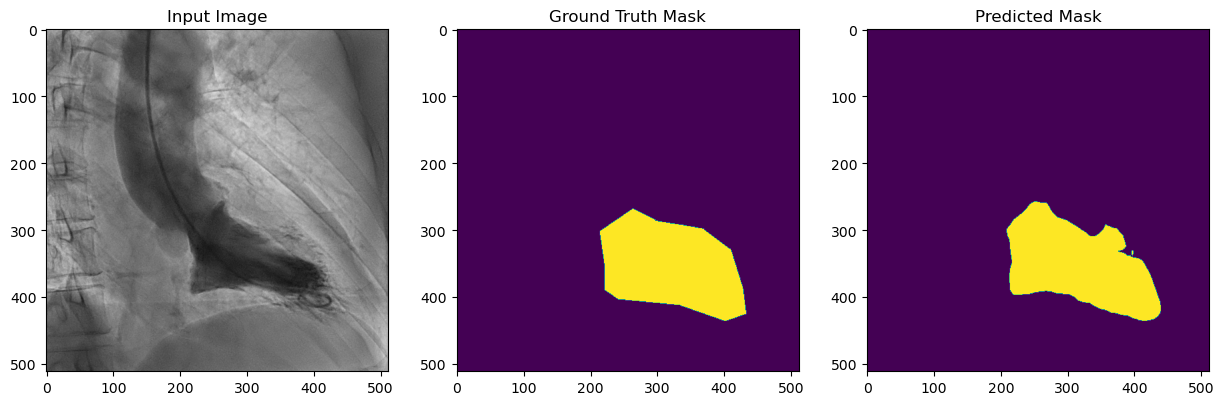

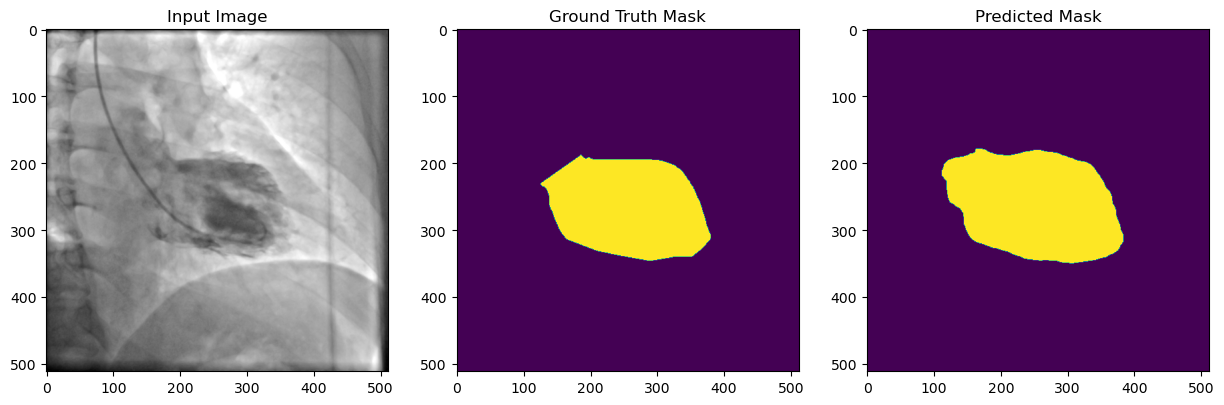

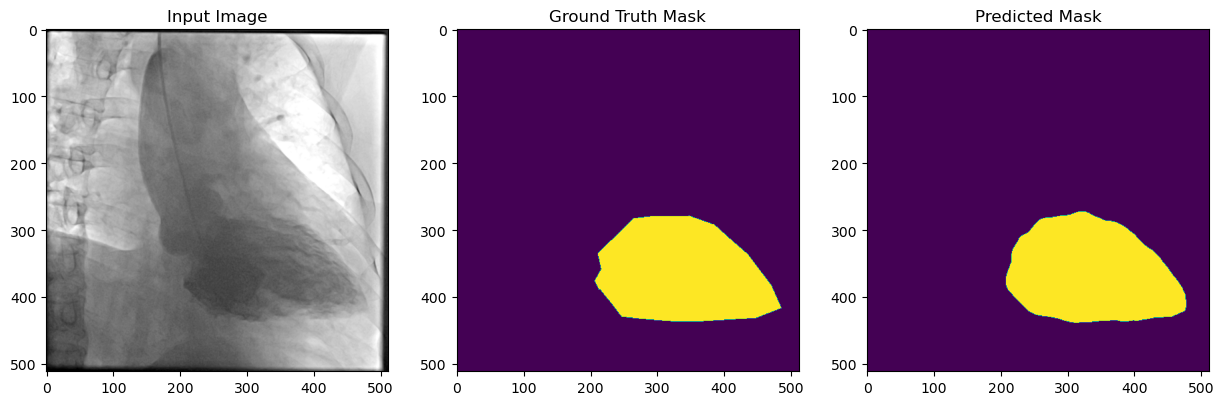

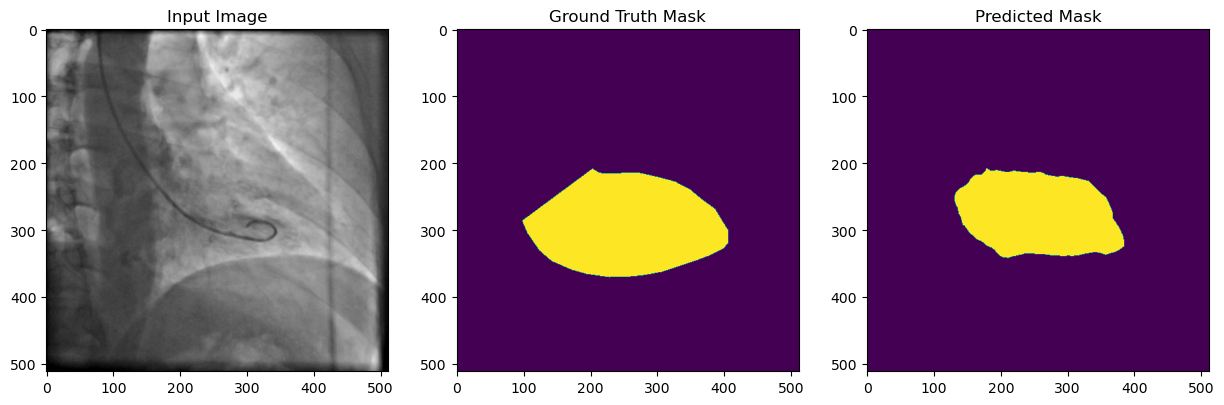

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as TF
from segmentation_models_pytorch import PSPNet
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

# Dataset Preparation
class SegmentationDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        """
        Initialize the dataset with paths to images and masks.
        """
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform
        
        # Filter to include only images with corresponding masks
        image_files = set(os.listdir(image_folder))
        mask_files = set(os.listdir(mask_folder))
        
        # Retain only files with matching base names (without extensions)
        self.image_filenames = sorted([
            img for img in image_files if os.path.splitext(img)[0] in {
                os.path.splitext(mask)[0] for mask in mask_files
            }
        ])
        self.mask_filenames = sorted([
            mask for mask in mask_files if os.path.splitext(mask)[0] in {
                os.path.splitext(img)[0] for img in image_files
            }
        ])

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_folder, self.image_filenames[idx])
        mask_path = os.path.join(self.mask_folder, self.mask_filenames[idx])

        # Load image and mask
        image = TF.to_tensor(Image.open(image_path).convert("RGB"))
        mask = torch.tensor(np.array(Image.open(mask_path)), dtype=torch.long)

        # Normalize mask to values 0 and 1 if it's binary segmentation
        mask = (mask > 0).long()

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        
        return image, mask

# Paths
IMAGE_FOLDER = "/Users/sandhyakilari/Desktop/Fall Semester 2024/Computer Vision/Segmentation Project/images"  
MASK_FOLDER = "/Users/sandhyakilari/Desktop/Fall Semester 2024/Computer Vision/Segmentation Project/masks"    

# Dataset and DataLoader
dataset = SegmentationDataset(IMAGE_FOLDER, MASK_FOLDER)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Define PSPNet Model
model = PSPNet(
    encoder_name="resnet34",         # Backbone
    encoder_weights="imagenet",     # Pre-trained weights
    in_channels=3,                  # RGB input
    classes=2                       # Binary segmentation (1 class + background)
)

# Move model to device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class segmentation
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training and Validation Loop
num_epochs = 20
best_loss = float("inf")
best_model_path = "./best_pspnet_model.pth"

for epoch in range(num_epochs):
    # Training Loop
    model.train()
    train_loss = 0
    for images, masks in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, masks = images.to(device), masks.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)

    # Validation Loop
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, masks in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}"):
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()

    val_loss /= len(val_dataloader)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Save the best model
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), best_model_path)
        print(f"Best model saved with validation loss: {best_loss:.4f}")

# Evaluate Model
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Visualization
def visualize_results(dataloader, model, device):
    """
    Visualize predictions, ground truth masks, and input images.
    """
    model.eval()
    with torch.no_grad():
        for images, masks in dataloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            # Plot results
            for i in range(len(images)):
                plt.figure(figsize=(15, 5))
                
                # Input Image
                plt.subplot(1, 3, 1)
                plt.imshow(images[i].cpu().permute(1, 2, 0))
                plt.title("Input Image")

                # Ground Truth
                plt.subplot(1, 3, 2)
                plt.imshow(masks[i].cpu())
                plt.title("Ground Truth Mask")

                # Prediction
                plt.subplot(1, 3, 3)
                plt.imshow(preds[i].cpu())
                plt.title("Predicted Mask")

                plt.show()
            break

visualize_results(val_dataloader, model, device)

In [4]:
from sklearn.model_selection import train_test_split

train_val_indices, test_indices = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)
train_indices, val_indices = train_test_split(train_val_indices, test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)
test_dataset = torch.utils.data.Subset(dataset, test_indices)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

model.load_state_dict(torch.load("./best_pspnet_model.pth", weights_only=True))
model.eval()
print("Model weights loaded successfully!")

import numpy as np

def compute_metrics(preds, masks, threshold=0.5):
    """
    Compute IoU, Dice Coefficient, and Pixel Accuracy for predictions and ground truth masks.
    """
    preds = (preds > threshold).int()
    masks = masks.int()

    # Intersection and Union
    intersection = (preds & masks).float().sum((1, 2))
    union = (preds | masks).float().sum((1, 2))
    
    # IoU
    iou = (intersection / union).mean().item()

    # Dice Coefficient
    dice = (2 * intersection / (preds.float().sum((1, 2)) + masks.float().sum((1, 2)))).mean().item()

    # Pixel Accuracy
    pixel_accuracy = (preds == masks).float().mean().item()

    return iou, dice, pixel_accuracy

# Test Loop
iou_scores, dice_scores, pixel_accuracies = [], [], []
with torch.no_grad():
    for images, masks in tqdm(test_dataloader, desc="Testing"):
        images, masks = images.to(device), masks.to(device)

        # Model predictions
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)  # Get predicted class

        # Compute metrics
        iou, dice, pixel_acc = compute_metrics(preds, masks)
        iou_scores.append(iou)
        dice_scores.append(dice)
        pixel_accuracies.append(pixel_acc)

# Report Mean Metrics
print(f"Test IoU: {np.mean(iou_scores):.4f}")
print(f"Test Dice Coefficient: {np.mean(dice_scores):.4f}")
print(f"Test Pixel Accuracy: {np.mean(pixel_accuracies):.4f}")

Model weights loaded successfully!


Testing: 100%|██████████| 86/86 [00:41<00:00,  2.08it/s]

Test IoU: 0.9343
Test Dice Coefficient: 0.9659
Test Pixel Accuracy: 0.9901
